Pitching Stat - Random Forest

In [ ]:
# from pybaseball import pitching_stats_bref
# import pandas as pd
# pitch_bref = pitching_stats_bref(2008)
# mvp_playerid_full = pd.read_csv('Full_Data.csv')
# mvp_playerid_full['Name']=mvp_playerid_full['nameFirst'] + " " + mvp_playerid_full['nameLast']
# mvp_playerid_full.head()
# mvp_player_pitch_bref = pitch_bref.merge(mvp_playerid_full[['Name', 'awardID', 'yearID']], right_on = ('Name','yearID'), left_on = ('Name','yearID'), how='left', suffixes=('_mvp', '_pitch'))


In [1]:
import pandas as pd

data=pd.read_csv('Final_Project/Full_Data.csv')
data.head()

C:\Users\codyb\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (1,2,51,53,54,58,59,60,61,62,63,64,65) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Season,Name_bat,Team_bat,Age_bat,G_bat,PA,H_bat,1B,2B,3B,...,teamID_y,lgID,key_fangraphs_y,key_bbref_y,yearID,teamID,G,W_team,L_team,Playoffs
0,1963,Buster Narum,Orioles,22.0,7.0,1.0,1.0,0.0,0.0,0.0,...,BAL,AL,1009455.0,narumbu01,1963.0,BAL,162.0,86.0,76.0,0.0
1,2010,Gustavo Chacin,Astros,29.0,44.0,1.0,1.0,0.0,0.0,0.0,...,HOU,NL,2060.0,chacigu01,2010.0,HOU,162.0,76.0,86.0,0.0
2,1938,Bill Lefebvre,Red Sox,22.0,1.0,1.0,1.0,0.0,0.0,0.0,...,BOS,AL,1007472.0,lefebbi01,1938.0,BOS,150.0,88.0,61.0,0.0
3,2008,Felix Hernandez,Mariners,22.0,31.0,2.0,1.0,0.0,0.0,0.0,...,SEA,AL,4772.0,hernafe02,2008.0,SEA,162.0,61.0,101.0,0.0
4,2005,Eddie Rogers,Orioles,26.0,8.0,1.0,1.0,0.0,0.0,0.0,...,BAL,AL,1621.0,rogered01,2005.0,BAL,162.0,74.0,88.0,0.0


In [67]:
data["HR/PA"] = data["HR_bat"]/data["PA"]
data["R/PA"] = data["R_bat"]/data["PA"]
data["RBI/PA"] = data["RBI"]/data["PA"]

In [68]:
import numpy as np
data['MVP_Classification']=data['awardID']
data['MVP_Classification'] = data['MVP_Classification'].map({'MVP': 1})
data['MVP_Classification'] = data['MVP_Classification'].replace(np.nan, 0)

In [69]:
data.head()

,Season,Name_bat,Team_bat,Age_bat,G_bat,PA,H_bat,1B,2B,3B,...,yearID,teamID,G,W_team,L_team,Playoffs,MVP_Classification,HR/PA,R/PA,RBI/PA
0,1963,Buster Narum,Orioles,22.0,7.0,1.0,1.0,0.0,0.0,0.0,...,1963.0,BAL,162.0,86.0,76.0,0.0,0.0,1.0,1.0,2.0
1,2010,Gustavo Chacin,Astros,29.0,44.0,1.0,1.0,0.0,0.0,0.0,...,2010.0,HOU,162.0,76.0,86.0,0.0,0.0,1.0,1.0,1.0
2,1938,Bill Lefebvre,Red Sox,22.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1938.0,BOS,150.0,88.0,61.0,0.0,0.0,1.0,1.0,1.0
3,2008,Felix Hernandez,Mariners,22.0,31.0,2.0,1.0,0.0,0.0,0.0,...,2008.0,SEA,162.0,61.0,101.0,0.0,0.0,0.5,0.5,2.0
4,2005,Eddie Rogers,Orioles,26.0,8.0,1.0,1.0,0.0,0.0,0.0,...,2005.0,BAL,162.0,74.0,88.0,0.0,0.0,1.0,4.0,2.0


In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
print(data.columns, data.dtypes)

Index(['Season', 'Name_bat', 'Team_bat', 'Age_bat', 'G_bat', 'PA', 'H_bat',
       '1B', '2B', '3B', 'HR_bat', 'R_bat', 'RBI', 'BB_bat', 'SB', 'AVG',
       'OBP', 'SLG', 'OPS', 'wOBA', 'WAR_bat', 'playerid', 'Name_pit',
       'Team_pit', 'Season.1', 'Age_pit', 'W_pit', 'L_pit', 'ERA', 'G_pit',
       'GS', 'CG', 'ShO', 'SV', 'BS', 'IP', 'H_pit', 'R_pit', 'ER', 'HR_pit',
       'BB_pit', 'SO', 'K/9', 'BB/9', 'K/BB', 'WHIP', 'FIP', 'WAR_pit', 'Team',
       'Pos', 'FP', 'awardID', 'yearID_x', 'lgID_mvp', 'playerID', 'pointsWon',
       'pointsMax', 'votesFirst', 'lgID_batting', 'teamID_x', 'nameFirst',
       'nameLast', 'nameGiven', 'retroID', 'bbrefID', 'key_bbref_x',
       'key_fangraphs_x', 'yearID_y', 'teamID_y', 'lgID', 'key_fangraphs_y',
       'key_bbref_y', 'yearID', 'teamID', 'G', 'W_team', 'L_team', 'Playoffs',
       'MVP_Classification', 'HR/PA', 'R/PA', 'RBI/PA'],
      dtype='object') Season                  int64
Name_bat               object
Team_bat               obj

In [72]:
# from sklearn.model_selection import train_test_split
# y=data['MVP_Classification']
# X=data.drop(['Season','Name_bat','Team_bat','Age_bat', 'playerid','Name_pit','Team_pit',
#              'Season.1','Age_pit', 'Team', 'Unnamed: 0', 'yearID_pit', 'lgID_mvp', 'playerID',
#              'lgID_batting', 'teamID', 'nameFirst', 'nameLast', 'nameGiven', 'retroID', 'bbrefID',
#        'fullName', 'key_bbref', 'key_fangraphs', 'yearID_team', 'teamIDBR',
#        'G', 'W_team', 'L_team', 'MVP_Classification'], axis=1)
# X = X.fillna(value=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    
# X_train= X_train.drop(['Season','Name_bat','Team_bat','Age_bat', 'playerid','Name_pit','Team_pit',
#              'Season.1','Age_pit', 'Team', 'Unnamed: 0', 'yearID_pit', 'lgID_mvp', 'playerID',
#              'lgID_batting', 'teamID', 'nameFirst', 'nameLast', 'nameGiven', 'retroID', 'bbrefID',
#        'fullName', 'key_bbref', 'key_fangraphs', 'yearID_team', 'teamIDBR',
#        'G', 'W_team', 'L_team', 'MVP_Classification'], axis=1)

In [73]:
data_encoded = pd.get_dummies(data, columns=["Pos"])
data_encoded.head()

,Season,Name_bat,Team_bat,Age_bat,G_bat,PA,H_bat,1B,2B,3B,...,RBI/PA,Pos_1B,Pos_2B,Pos_3B,Pos_C,Pos_CF,Pos_LF,Pos_P,Pos_RF,Pos_SS
0,1963,Buster Narum,Orioles,22.0,7.0,1.0,1.0,0.0,0.0,0.0,...,2.0,0,0,0,0,0,0,1,0,0
1,2010,Gustavo Chacin,Astros,29.0,44.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0,0,0,0,0,0,1,0,0
2,1938,Bill Lefebvre,Red Sox,22.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0,0,0,0,0,0,1,0,0
3,2008,Felix Hernandez,Mariners,22.0,31.0,2.0,1.0,0.0,0.0,0.0,...,2.0,0,0,0,0,0,0,1,0,0
4,2005,Eddie Rogers,Orioles,26.0,8.0,1.0,1.0,0.0,0.0,0.0,...,2.0,0,0,0,0,0,0,0,0,1


In [126]:
from sklearn.preprocessing import StandardScaler
data_2000=data_encoded[data_encoded['Season']==2011]
data_2000=data_2000[data_2000['lgID']=="NL"]
data_2000 = data_2000.fillna(value=0)
y_2000=data_2000['MVP_Classification']
X_2000_encoded=data_2000[['PA','HR/PA', 'R/PA', 'RBI/PA','SB',
                 'AVG','OBP', 'SLG','wOBA', 'WAR_bat','W_pit', 'L_pit', 'ERA', 'G_pit',
                 'CG', 'ShO', 'SV','IP', 
                 'K/9', 'BB/9', 'WHIP','FIP', 'WAR_pit','FP','Playoffs', 'Pos_1B', 'Pos_2B', 'Pos_3B',
                 'Pos_C', 'Pos_CF', 'Pos_LF', 'Pos_P', 'Pos_RF', 'Pos_SS']]
X_scaler = StandardScaler().fit(X_2000_encoded)
# pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
X_2000_encoded = pd.DataFrame(X_scaler.transform(X_2000_encoded), columns=X_2000_encoded.columns)

In [127]:
X_2000_encoded.head()
# X_2000.dtypes

,PA,HR/PA,R/PA,RBI/PA,SB,AVG,OBP,SLG,wOBA,WAR_bat,...,Playoffs,Pos_1B,Pos_2B,Pos_3B,Pos_C,Pos_CF,Pos_LF,Pos_P,Pos_RF,Pos_SS
0,-0.710702,-0.610538,-0.812693,10.402721,-0.378899,6.057725,4.376665,8.410038,6.473471,-0.279444,...,-0.567309,-0.241417,-0.254588,-0.273434,-0.314207,-0.22766,-0.273434,1.014599,-0.251345,-0.220527
1,-0.710702,-0.610538,-0.812693,10.402721,-0.378899,6.057725,4.376665,3.668082,4.183971,-0.279444,...,-0.567309,-0.241417,-0.254588,-0.273434,-0.314207,-0.22766,-0.273434,1.014599,-0.251345,-0.220527
2,-0.710702,-0.610538,-0.812693,-0.679952,-0.378899,6.057725,4.376665,3.668082,4.183971,-0.279444,...,1.762709,-0.241417,-0.254588,-0.273434,-0.314207,-0.22766,-0.273434,1.014599,-0.251345,-0.220527
3,-0.705618,-0.610538,5.513334,-0.679952,-0.378899,6.057725,4.376665,3.668082,3.593520,-0.279444,...,-0.567309,-0.241417,-0.254588,-0.273434,-0.314207,-0.22766,-0.273434,1.014599,-0.251345,-0.220527
4,-0.710702,-0.610538,-0.812693,-0.679952,-0.378899,-1.109582,4.376665,-1.073874,3.003070,-0.362951,...,-0.567309,-0.241417,-0.254588,-0.273434,-0.314207,-0.22766,-0.273434,1.014599,-0.251345,-0.220527


In [128]:
 # Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_2000_encoded, y_2000)
rf.score(X_2000_encoded, y_2000)

1.0

In [129]:
importances = rf.feature_importances_
importances

array([ 0.12852413,  0.04759243,  0.02420035,  0.03441677,  0.03478678,
        0.05197331,  0.04485065,  0.07287781,  0.05901212,  0.20332239,
        0.04089253,  0.00822466,  0.00860661,  0.0088161 ,  0.02975571,
        0.0076306 ,  0.03481218,  0.03460948,  0.00820627,  0.00489867,
        0.00572669,  0.00611645,  0.02972074,  0.02320161,  0.01150339,
        0.00509889,  0.00190664,  0.00280999,  0.00621852,  0.00355873,
        0.00493808,  0.00027615,  0.00542003,  0.00549454])

Pitching - Feature Importances

In [130]:
list=sorted(zip(rf.feature_importances_, X_2000_encoded.columns), reverse=True)
# top 10 feature importances
list_10=list[:10]
list_10

[(0.2033223879384824, 'WAR_bat'),
 (0.12852413434882901, 'PA'),
 (0.072877805335672063, 'SLG'),
 (0.059012119876078975, 'wOBA'),
 (0.051973309250013797, 'AVG'),
 (0.047592430053693367, 'HR/PA'),
 (0.044850650793882209, 'OBP'),
 (0.040892526330019489, 'W_pit'),
 (0.034812178164978648, 'SV'),
 (0.034786783975261651, 'SB')]

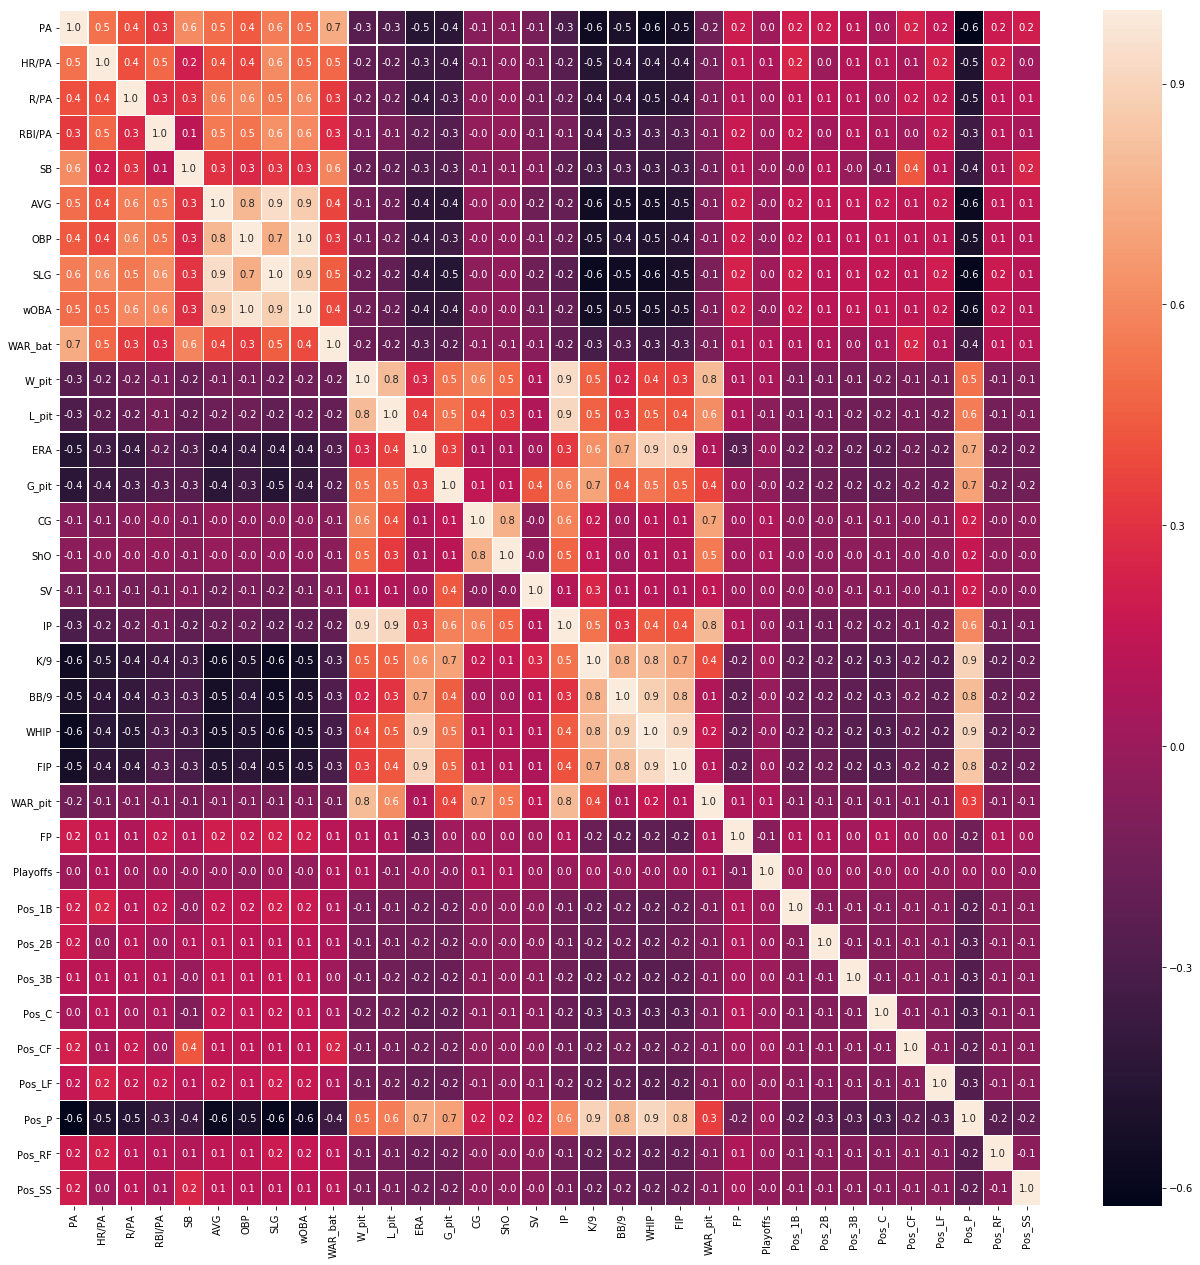

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt
f,ax = plt.subplots(figsize=(22, 22))
sns.heatmap(X_2000_encoded.corr(), annot=True, linewidths=.5, 
            fmt= '.1f',ax=ax)
plt.show()

In [132]:
# Logistic regression

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [138]:
data_2000["MVP Prediction"] = rf.predict(X_2000_encoded)

pred_mvp = data_2000[data_2000["MVP Prediction"]==1]
pred_mvp.head()

,Season,Name_bat,Team_bat,Age_bat,G_bat,PA,H_bat,1B,2B,3B,...,Pos_1B,Pos_2B,Pos_3B,Pos_C,Pos_CF,Pos_LF,Pos_P,Pos_RF,Pos_SS,MVP Prediction
2404,2011,Ryan Braun,Brewers,27.0,150.0,629.0,187.0,110.0,38.0,6.0,...,0,0,0,0,0,1,0,0,0,1.0
2936,2011,Matt Kemp,Dodgers,26.0,161.0,689.0,195.0,119.0,33.0,4.0,...,0,0,0,0,1,0,0,0,0,1.0
3059,2011,Prince Fielder,Brewers,27.0,162.0,692.0,170.0,95.0,36.0,1.0,...,1,0,0,0,0,0,0,0,0,1.0
3178,2011,Lance Berkman,Cardinals,35.0,145.0,587.0,147.0,91.0,23.0,2.0,...,0,0,0,0,0,0,0,1,0,1.0
3290,2011,Joey Votto,Reds,27.0,161.0,719.0,185.0,113.0,40.0,3.0,...,1,0,0,0,0,0,0,0,0,1.0


In [139]:
y_reg=pred_mvp['pointsWon']
X_reg=pred_mvp[['PA','HR/PA', 'R/PA', 'RBI/PA','SB',
                 'AVG','OBP', 'SLG','wOBA', 'WAR_bat','W_pit', 'L_pit', 'ERA', 'G_pit',
                 'CG', 'ShO', 'SV','IP', 
                 'K/9', 'BB/9', 'WHIP','FIP', 'WAR_pit','FP','Playoffs', 'Pos_1B', 'Pos_2B', 'Pos_3B',
                 'Pos_C', 'Pos_CF', 'Pos_LF', 'Pos_P', 'Pos_RF', 'Pos_SS']]
X_scaler = StandardScaler().fit(X_reg)
X_reg = pd.DataFrame(X_scaler.transform(X_reg), columns=X_reg.columns)

In [140]:
model.fit(X_reg,y_reg)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [141]:
model.predict(X_reg)

array([ 388.,  332.,  229.,  118.,  135.,    1.,    5.,   69.,  214.,
        166.,    7.,    1.,   10.,   31.,   18.,   39.,    2.,    2.,
          1.,    2.,   29.,   12.,   16.,   52.,    1.,    7.])

In [142]:
pred_mvp['pointsWon']

2404     388.0
2936     332.0
3059     229.0
3178     118.0
3290     135.0
4461       3.0
4505       5.0
4601      69.0
4989     214.0
5153     166.0
5214       7.0
5473       1.0
5951      10.0
6095      31.0
7486      18.0
9958      39.0
10587      2.0
10606      2.0
14434      1.0
15766      1.0
40663     29.0
41344     12.0
46460     16.0
50530     52.0
64154      1.0
64262      7.0
Name: pointsWon, dtype: float64

Batting Stat - Random Forest

In [ ]:
# from pybaseball import batting_stats
# import pandas as pd
# batting = batting_stats(1990)


In [ ]:
# mvp_player_batting = batting.merge(mvp_playerid_full[['Name', 'awardID','yearID']], right_on = ('Name', 'yearID'), left_on = ('Name', 'Season'), how='left', suffixes=('_mvp', '_batch'))

In [ ]:
# mvp_player_batting['MVP_Classification']=mvp_player_batting['awardID']
# mvp_player_batting['MVP_Classification'] = mvp_player_batting['MVP_Classification'].map({'MVP': 1})
# mvp_player_batting['MVP_Classification'] = mvp_player_batting['MVP_Classification'].replace(np.nan, 0)

In [ ]:
# from sklearn.model_selection import train_test_split
# y=mvp_player_batting['MVP_Classification']
# X=mvp_player_batting.drop(['MVP_Classification','awardID', 'Team', 'Name','Age Rng'], axis=1)
# X = X.fillna(value=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
#  # Create a random forest classifier
# rf = RandomForestClassifier(n_estimators=200)
# rf = rf.fit(X_train, y_train)
# rf.score(X_train, y_train)

In [ ]:
# importances = rf.feature_importances_
# importances

Batting - Feature Importances

In [ ]:
# df=sorted(zip(rf.feature_importances_, X_train.columns), reverse=True)
# value = []
# label = []

In [ ]:
# import matplotlib.pyplot as plt

In [ ]:
# plt.bar(X_train.columns, rf.feature_importances_, align='center', alpha=0.5)
# plt.show()